\section*{Excercise 6.9}

\subsection*{a)}
Noting that, for m,n positive interger 

\begin{equation*}
\int_0^L \sin{\frac{\pi m x}{L}}  \sin{\frac{\pi n x}{L}}  dx = \begin{cases} L/2 & \text{if } m = n,\\
0 & \text{otherwise},
\end{cases}
\end{equation*}

show that the Schrödinger equation $\hat{H}\psi = E \psi$ implies that 
$$ \sum_{n=1}^\infty \psi_n \int_0^L \sin{\frac{\pi m x}{L}} \hat{H} \sin{\frac{\pi n x}{L}}  dx = \frac12 LE\psi_m$$

**Solución**

La ecuación de Schrödinger se convierte en 
\begin{gather*}
\hat H\psi = E\psi \\
\hat H \sum_{n=1}^\infty \psi_n  \sin{\frac{\pi n x}{L}} = E    \sum_{n=1}^\infty \psi_n  \sin{\frac{\pi n x}{L}} 
\end{gather*}


Ahora solo multiplicamos por $\sin{\dfrac{\pi m x}{L}}$ e integramos 

\begin{gather*}
\sum_{n=1}^\infty \psi_n \int_0^L \sin{\frac{\pi m x}{L}} \hat{H} \sin{\frac{\pi n x}{L}}  dx = E\int_0^L     \sum_{n=1}^\infty \psi_n \sin{\frac{\pi m x}{L}} \sin{\frac{\pi n x}{L}} dx \\
\end{gather*}

Obtenemos al lado derecho 0 a menos que $m=n$ por lo tanto 

$$ \sum_{n=1}^\infty \psi_n \int_0^L \sin{\frac{\pi m x}{L}} \hat{H} \sin{\frac{\pi n x}{L}}  dx = E   \psi_m\int_0^L   \sin{\frac{\pi m x}{L}} \sin{\frac{\pi m x}{L}} dx$$

Obtenemos 
$$ \sum_{n=1}^\infty \psi_n \int_0^L \sin{\frac{\pi m x}{L}} \hat{H} \sin{\frac{\pi n x}{L}}  dx = \frac12 LE\psi_m$$

Por lo tanto los elementos del operador $\hat H$ son
\begin{gather*}
H_{mn} = \frac2L \int_0^L  \sin{\frac{\pi m x}{L}} \hat{H} \sin{\frac{\pi n x}{L}}  dx \\
 = \frac2L \int_0^L  \sin{\frac{\pi m x}{L}}\left[ -\frac{\hbar^2}{2M} \frac{d^2}{dx^2} + V(x) \right] \sin{\frac{\pi n x}{L}}  dx\\
 =  \frac2L \int_0^L  \sin{\frac{\pi m x}{L}}\left[ \frac{\hbar^2}{2M}(\frac{\pi n }{L})^2\sin{\frac{\pi n x}{L}}  + V(x)\sin{\frac{\pi n x}{L}} \right] dx
\end{gather*}

\subsection*{b)}

For the case $V(x) = \dfrac{ax}{L}$, evaluate the integral in $H_{mn}$ analytically and find a general expression for the matrix elements. Show that the matrix is real and symmetric. Note that 
$$\int_0^L x\sin \frac{\pi m x}{L} \sin\frac{\pi n x}{L} dx =
\begin{cases} 
0 & \text{if $m\neq n$ and both even or odd}\\
- \left(\dfrac{2L}{\pi} \right)^2 \dfrac{mn}{(m^2 -n^2)^2} & \text{if $m \neq n$ and one is even, one is odd} \\
\dfrac{L^2}{4} & \text{if $ m=n$}
\end{cases}
$$

Write a Python program to evaluate your expression for $H_{mn}$ for arbitrary $m$ and $n$ when the particle is an electron.

**Solución**

\begin{gather*}
\frac2L \int_0^L \sin{\frac{\pi m x}{L}}\left[ \frac{\hbar^2}{2M}(\frac{\pi n }{L})^2\sin{\frac{\pi n x}{L}}  + V(x)\sin{\frac{\pi n x}{L}} \right] dx \\
=\frac2L \int_0^L \sin{\frac{\pi m x}{L}}\left[\frac{\hbar^2}{2M}(\frac{\pi n }{L})^2\sin{\frac{\pi n x}{L}}  +  \frac{ax}{L} \sin{\frac{\pi n x}{L}} \right] dx \\
=\frac2L \int_0^L \frac{\hbar^2}{2M}(\frac{\pi n }{L})^2\sin{\frac{\pi m x}{L}}\sin{\frac{\pi n x}{L}}  +  \frac{ax}{L} \sin{\frac{\pi m x}{L}} \sin{\frac{\pi n x}{L}} dx 
\end{gather*}

$$= \begin{cases}
 \dfrac{\hbar^2}{2M}(\dfrac{\pi n }{L})^2 +  \dfrac{a}{2} & \text{if $m=n$}\\
 - \left(\dfrac{2}{\pi} \right)^2 \dfrac{2amn}{(m^2 -n^2)^2}  & \text{if $m\neq n$, and one is even one is odd}\\
 0 & \text{if $m\neq n$ and both are even or odd}
\end{cases}$$

Es facil ver que el operador $\hat H$ es real ya que ninguno de sus $n\times m$ elementos son complejos. Para ver que el operador es simétrico entonces $ \hat H^T= \hat H \to  H_{ij} = H_{ji}$. Tenemos las siguientes observaciones:

1. Sabemos que si $n=m$ los elementos $H_{mm}$ corresponden a las diagonales y estas no se mueven bajo la transpuesta.
2. Sabemos que para los elementos donde n y m son distintos pero ambos son pares o ambos son impares $H_{mn}$  obtiene el valor de 0. Osea $H_{24}=H_{26}=H_{28}\dots =H_{42} =H_{62} = H_{82}\dots =H_{35} = H_{53} \dots = H_{mn} = H_{nm}$.
2. Sabemos que si $n\neq m$ y uno es par pero el otro es impar entonces $H_{mn}=0$.


Un ejemplo de una matriz así es 

$$ \begin{pmatrix}
\xmat{H}{5}{5}
\end{pmatrix}
$$

aplicando nuestras observaciones este operador es real y simétrico


In [1]:
import numpy as np
from math import pi
def H(m,n,Mass=9.1094e-31,width=5e-10,a=10):
    L= width
    hbar = 6.5821e-16 #eV*s
    H_mn = np.zeros((m,n))
    for i in range(1,m+1):
        for j in range(1,n+1):
            if i == j :
                H_mn[i-1,j-1] = (pi*i/L)**2 *(hbar**2 / (2*Mass))*(1.6022e-19) + a/2
            elif i!=j and not i%2 ==j%2:
                H_mn[i-1,j-1] = -(2/pi)**2 *(2*a*i*j/(i**2 - j**2)**2)
            elif i!=j and  i%2 ==j%2 :
                H_mn[i-1,j-1]=0
    return H_mn
    
# para V(x) = ax/L

In [2]:
H(3,3)

array([[ 6.50413095, -1.80126549,  0.        ],
       [-1.80126549, 11.0165238 , -1.94536673],
       [ 0.        , -1.94536673, 18.53717856]])

\subsection*{c)}

Modify the program to create a $10 \times 10$ array elements of **H** up to $m,n=10$. Calculate the eigenvalues of this matrix using `numpy.linalg` and print out in units of electron volts, the first 10 energy levels of the quantum well. 

In [3]:
H(10,10)

array([[ 6.50413095e+00, -1.80126549e+00,  0.00000000e+00,
        -1.44101239e-01,  0.00000000e+00, -3.97013618e-02,
         0.00000000e+00, -1.63380090e-02,  0.00000000e+00,
        -8.27027313e-03],
       [-1.80126549e+00,  1.10165238e+01, -1.94536673e+00,
         0.00000000e+00, -1.83802601e-01,  0.00000000e+00,
        -5.60393707e-02,  0.00000000e+00, -2.46082821e-02,
         0.00000000e+00],
       [ 0.00000000e+00, -1.94536673e+00,  1.85371786e+01,
        -1.98506809e+00,  0.00000000e+00, -2.00140610e-01,
         0.00000000e+00, -6.43096438e-02,  0.00000000e+00,
        -2.93649125e-02],
       [-1.44101239e-01,  0.00000000e+00, -1.98506809e+00,
         2.90660952e+01, -2.00140610e+00,  0.00000000e+00,
        -2.08410883e-01,  0.00000000e+00, -6.90662743e-02,
         0.00000000e+00],
       [ 0.00000000e+00, -1.83802601e-01,  0.00000000e+00,
        -2.00140610e+00,  4.26032738e+01, -2.00967637e+00,
         0.00000000e+00, -2.13167513e-01,  0.00000000e+00,
        -7.

In [4]:
print("La energía en el estado base es de {} eV".format(np.linalg.eigvalsh(H(10,10))[0]))

La energía en el estado base es de 5.836391175194077 eV


\clearpage

OJO EJEMPLO 9.2 NO SE ENCUENTRA EN EL LIBRO!!!!

![](problema2.png)

In [5]:
from numpy import sqrt, zeros, empty,max
from pylab import imshow, show, gray,colorbar
import matplotlib.pyplot as plt

In [6]:
# Constants
M = 100         # Grid squares on a side
target = 1e-6   # Target accuracy
epsilon_0 = 1 
a=1
# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)

phiprime = empty([M+1,M+1],float)

charge=1 # charge density in C/m^2

def rho(i, j):
    if 20 < i < 40 and 60 < j < 80:
        return charge
    elif 60 < i < 80 and 20 < j < 40:
        return -charge
    else:
        return 0 
    
    
# Main loop
delta = 1.0
iter=0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 + a**2 *rho(i,j)/(4*epsilon_0)
    iter+=1
    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

Toma 9145 iteraciones


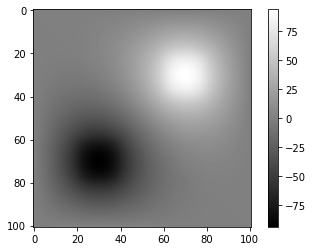

In [7]:
print("Toma {} iteraciones".format(iter))
# Make a plot
imshow(phi)
colorbar()
gray()
show()

\newpage

![](problema3.png)

In [ ]:
# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

for omega in np.arange(0.89,.96,.01):
    # Main loop
    # Create arrays to hold potential values
    phi = zeros([M+1,M+1],float)
    phi[0,:] = V
    iter=0
    delta = 1
    while delta>target:
        delta = 0 # reset the error 
        # Calculate new values of the potential
        for i in range(M+1):
            for j in range(M+1):
                if not i == 0 and not j == 0 and not i == M and not j == M:
                    oldphi= phi[i,j]
                    phi[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] \
                                               + phi[i,j+1] + phi[i,j-1])/4 - omega*phi[i,j]

        # Calculate maximum difference from old values
                    delta = max([delta,abs(oldphi-phi[i,j])])
            

        iter+=1
    print('Para omega= {:.2f} hubo {} iteraciones con delta ={}'.format(omega,iter,delta))

# Make a plot
imshow(phi)
colorbar()
gray()
show()

Para omega= 0.89 hubo 471 iteraciones con delta =9.977841521902064e-07
Para omega= 0.90 hubo 423 iteraciones con delta =9.885198457570965e-07


![](problema4.png)

In [ ]:
from pylab import plot,xlabel,ylabel,show,legend,figure

In [ ]:
def Temp(t):
    A=10
    B=12
    tau=365
    T0= A+B *np.sin(2*pi*t/tau)
    return T0

# Constants
L = 20      # Thickness of crust in meters
D = 0.1  # Thermal diffusivity in m^2 per day
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
stable=a**2/(2*D)
h =  stable /500      # Time-step per day
epsilon = h/10

Tlo = Temp(0)    # Low temperature in Celcius
Tmid = 10.0   # Intermediate temperature in Celcius
Thi = 11.0    # Hi temperature in Celcius

t1 = 9*365 
t2 = t1 + 365/4
t3 = t2 + 365/4
t4 = t3 + 365/4
tend = t4 + epsilon
# print(t1,t2,t3,t4)
# Create arrays
T = empty(N+1,float)
T[0] = Tlo
T[N] = Thi
T[1:N] = Tmid

Tp = empty(N+1,float)
Tp[0] = Tlo
Tp[N] = Thi

# print(T,Tp)

# Main loop
t = 0.0
c = h*D/(a*a)
# print(h<a**2/(2*D))
figure(dpi=120,figsize=(8,6))
while t<tend:
    T[0]= Temp(t)
    # Calculate the new values of T
#     for i in range(1,N):
#         Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    Tp[1:N] = T[1:N] + c*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    T,Tp = Tp,T
    t += h
    

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plot(T,label="9 years")
        print("9 years")
#         print(T)
#         show()
    if abs(t-t2)<epsilon:
        plot(T,label="9 years + 3 months")
        print("9 years + 3 months")
#         show()
    if abs(t-t3)<epsilon:
        plot(T,label="9 years + 6 months")
        print("9 years + 6 months")
#         show()
    if abs(t-t4)<epsilon:
        plot(T,label="9 years + 9 months")
        print("9 years + 9 months")
#         show()
#     if abs(t-t5)<epsilon:
#         plot(T,label="9 years + 12 months")
#         print("9 years + 12 months")
# #         show()


xlabel("x")
legend()
ylabel("T")
show()